<a href="https://colab.research.google.com/github/shahidcodes/ml-intro-colabs/blob/master/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
!pip install quandl pandas sklearn
!pip install mpld3

In [0]:
import pandas as pd
import quandl
import numpy as np
import math
from sklearn import preprocessing, svm, model_selection
from sklearn.linear_model import LinearRegression
import mpld3 
import pickle
mpld3.enable_notebook()
odf = quandl.get("WIKI/GOOGL")

In [0]:
df = odf

**transform dataframe for meaningful features**

In [77]:
df = df[["Adj. Low","Adj. High", "Adj. Open", "Adj. Close", "Adj. Volume"]]
df["HL_PCT"] = ( df['Adj. High'] - df['Adj. Low'] ) / df['Adj. Low'] * 100.00
df["PCT_CHANGE"] = (df['Adj. Open'] - df['Adj. Close']) / df['Adj. Close'] * 100.00
df = df[['Adj. Close', 'PCT_CHANGE', 'HL_PCT', 'Adj. Volume']]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


**Fill null values with high negative value. In ML we can not work with null data. So we either remove the column or fill with a value that won't affect output.**

In [0]:
df.fillna(-999999999, inplace=True)

**determine forecast value and shift the label to that many days**  
Whats is forecast_out?
*   Forecast out is how many days we want the prediction
*   it is calculated based on df len



---



In [0]:
forecast_col = "Adj. Close"
# what the hell is this?
forecast_out = int(math.ceil(0.01 * len(df)))
df["label"] = df[forecast_col].shift(-forecast_out)

# Scaling in Machine Learning
Scaling in machine learning means normalizing data.
![feature scaling wiki](https://i.imgur.com/DGFO94W.png) 
i.e.
Consider a matrix 

$$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix}$$

after normalization (minmax(0,1) it will look like:

$$\begin{bmatrix} 0 & 0 & 0 \\ 0.5 & 0.5 & 0.5 \\ 1 & 1 & 1 \end{bmatrix}$$



In [80]:
oX = np.array(df.drop(['label'], 1))
X = oX
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)
classification = LinearRegression(n_jobs=-1)
# classification = svm.SVR(kernel="poly")
classification.fit(X_train, y_train)
# save 
accuracy = classification.score(X_test, y_test)
accuracy

0.9790076950093767

In [81]:
forecast_set = classification.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[1076.63180798 1090.72203345 1104.35956472 1099.24018313 1092.87764576
 1090.61525657 1089.15639589 1085.52467891 1079.77854717 1075.36019814
 1073.33898119 1091.84101189 1110.34116873 1115.65331615 1130.16810253
 1134.42437055 1132.74053513 1130.38439291 1132.11515068 1149.72407669
 1149.61285257 1158.89531264 1155.65429581 1163.73787615 1183.57234938
 1196.58447377 1190.77588795 1202.54715085 1207.28732679 1206.79870003
 1197.57473133 1202.43240137 1201.19349549 1136.91347284 1082.8652753 ] 0.9790076950093767 35


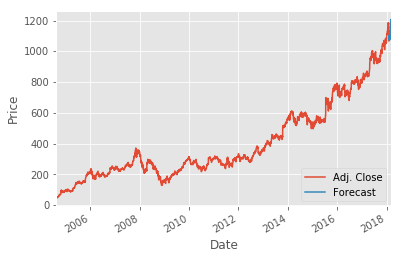

In [82]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()